In [1]:
import pandas as pd

In [2]:
# Import the Rotten Tomatoes bestofrt TSV file into a DataFrame
df = pd.read_csv('bestofrt.tsv',sep='\t')

In [3]:
# Check to see if the file was imported correctly
df.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


## BeautifulSoup for parsing html

In [4]:
from bs4 import BeautifulSoup
import os

In [5]:
with open('rt_html/et_the_extraterrestrial.html') as file:
    soup=BeautifulSoup(file,'lxml')

In [6]:
soup.find('title')

<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

In [7]:
soup.find('title').contents

['E.T. The Extra-Terrestrial\xa0(1982) - Rotten Tomatoes']

In [8]:
soup.find('title').contents[0][:-len(' - Rotten Tomatoes')].replace('\xa0',' ')

'E.T. The Extra-Terrestrial (1982)'

In [9]:
soup.find('div',class_="audience-score meter").find('span').contents[0][:-1]

'72'

In [10]:
num_ratings=soup.find('div',class_='audience-info hidden-xs superPageFontColor')
num_ratings.find_all('div')[1].contents[2].strip().replace(',','')

'32313030'

### Parse and gather relevant information

In [11]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file,'lxml')
        title=soup.find('title').contents[0][:-len(' - Rotten Tomatoes')].replace('\xa0',' ')
        audience_score=soup.find('div',class_="audience-score meter").find('span').contents[0][:-1]
        num_audience_ratings=soup.find('div',class_='audience-info hidden-xs superPageFontColor')
        num_audience_ratings=num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',','')

        
        
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
df_audience = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])

In [12]:
df_audience.head()

,title,audience_score,number_of_audience_ratings
0,Zootopia (2016),92,98633
1,The Treasure of the Sierra Madre (1948),93,25627
2,All Quiet on the Western Front (1930),89,17768
3,Rear Window (1954),95,149458
4,Selma (2015),86,60533


## Scraping the internet for data

In [13]:
# Make directory if it doesn't already exist
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [14]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [15]:
import requests

for url in ebert_review_urls:
    response=requests.get(url)
    with open(os.path.join(folder_name,
                           url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)


In [16]:
len(os.listdir(folder_name))

88

In [17]:
import glob
df_list=[]
for review in glob.glob('ebert_reviews/*.txt'):
    with open(review, encoding='utf-8') as file:
        title=file.readline()[:-1]
        review_url=file.readline()[:-1]
        review_text=file.read()
        print(title)

        df_list.append({'title': title,
                        'review_url': review_url,
                        'review_text': review_text})
        
df_ebert = pd.DataFrame(df_list, columns = ['title', 'review_url', 'review_text'])

Dunkirk (2017)
Army of Shadows (L'Armée des ombres) (1969)
Alien (1979)
The Bride of Frankenstein (1935)
The 400 Blows (Les Quatre cents coups) (1959)
Manchester by the Sea (2016)
Mad Max: Fury Road (2015)
Wonder Woman (2017)
Bicycle Thieves (Ladri di biciclette) (1949)
Laura (1944)
Toy Story (1995)
On the Waterfront (1954)
Toy Story 3 (2010)
Tokyo Story (Tôkyô monogatari) (1953)
La Grande illusion (Grand Illusion) (1938)
The Last Picture Show (1971)
Rear Window (1954)
Gone With the Wind (1939)
A Streetcar Named Desire (1951)
Pinocchio (1940)
King Kong (1933)
Arrival (2016)
Dr. Strangelove Or How I Learned to Stop Worrying and Love the Bomb (1964)
Argo (2012)
A Hard Day's Night (1964)
Selma (2015)
Hell or High Water (2016)
Gravity (2013)
Logan (2017)
Metropolis (1927)
The Big Sick (2017)
Rosemary's Baby (1968)
12 Angry Men (Twelve Angry Men) (1957)
Get Out (2017)
E.T. The Extra-Terrestrial (1982)
Zootopia (2016)
The Maltese Falcon (1941)
Up (2009)
The Wizard of Oz (1939)
Apocalypse Now

In [18]:
df_ebert.head()

,title,review_url,review_text
0,Dunkirk (2017),http://www.rogerebert.com/reviews/dunkirk-2017,"Lean and ambitious, unsentimental and bombasti..."
1,Army of Shadows (L'Armée des ombres) (1969),http://www.rogerebert.com/reviews/great-movie-...,"Jean-Pierre Melville's ""Army of Shadows"" is ab..."
2,Alien (1979),http://www.rogerebert.com/reviews/great-movie-...,"At its most fundamental level, ""Alien"" is a mo..."
3,The Bride of Frankenstein (1935),http://www.rogerebert.com/reviews/great-movie-...,To a new world of gods and monsters.\n\nSo int...
4,The 400 Blows (Les Quatre cents coups) (1959),http://www.rogerebert.com/reviews/great-movie-...,I demand that a film express either the joy of...


## Using APIs with MediaWiki to download movie posters

need to use wptools (a library for MediaWiki API) (use $ pip install wptools in terminal) 

In [19]:
import wptools

In [20]:
# get the page object
page =wptools.page('E.T._the_Extra-Terrestrial').get()

en.wikipedia.org (query) E.T._the_Extra-Terrestrial
en.wikipedia.org (parse) 73441
www.wikidata.org (wikidata) Q11621
www.wikidata.org (labels) Q30|P3135|P1970|P2363|P4632|P4276|Q7341...
www.wikidata.org (labels) P462|Q739633|P480|Q461742|Q8877|P4786|Q...
www.wikidata.org (labels) P2061|P1431|Q354873|Q139184|Q3953565|Q1...
www.wikidata.org (labels) P373|Q823422|P3107|Q505449|Q1720784|P18...
en.wikipedia.org (restbase) /page/summary/E.T._the_Extra-Terrestrial
en.wikipedia.org (imageinfo) File:ET logo 3.svg|File:E t the extr...
E.T. the Extra-Terrestrial (en) data
{
  aliases: <list(2)> E.T., ET
  claims: <dict(80)> P1562, P57, P272, P345, P31, P161, P373, P480...
  description: 1982 American science fiction film
  exhtml: <str(827)> <p><i><b>E.T. the Extra-Terrestrial</b></i> i...
  exrest: <str(796)> E.T. the Extra-Terrestrial is a 1982 American...
  extext: <str(1810)> _**E.T. the Extra-Terrestrial**_ is a 1982 A...
  extract: <str(1914)> <p><i><b>E.T. the Extra-Terrestrial</b></i>...

In [21]:
# Accessing the image attribute will return the images for this page
page.data['image'][0]

{'descriptionshorturl': 'https://en.wikipedia.org/w/index.php?curid=7419503',
 'descriptionurl': 'https://en.wikipedia.org/wiki/File:E_t_the_extra_terrestrial_ver3.jpg',
 'file': 'File:E t the extra terrestrial ver3.jpg',
 'height': 394,
 'kind': 'parse-image',
 'metadata': {'Assessments': {'hidden': '',
   'source': 'commons-categories',
   'value': ''},
  'Categories': {'hidden': '',
   'source': 'commons-categories',
   'value': 'All non-free media|E.T. the Extra-Terrestrial|Fair use images of movie posters|Files with no machine-readable author|Files with no machine-readable description|Files with no machine-readable license|Files with no machine-readable source|Noindexed pages|Non-free images for NFUR review|Non-free posters'},
  'CommonsMetadataExtension': {'hidden': '',
   'source': 'extension',
   'value': 1.2},
  'DateTime': {'hidden': '',
   'source': 'mediawiki-metadata',
   'value': '2016-06-04 10:30:46'},
  'NonFree': {'hidden': '', 'source': 'commons-desc-page', 'value': '

In [22]:
page.data['image'][0]['url']

'https://upload.wikimedia.org/wikipedia/en/6/66/E_t_the_extra_terrestrial_ver3.jpg'

JSON is used because we can have multiple pieces of data per key, JSON objects are organized like a dictionary, not a table. JSON arrays are organized like a list.

In [23]:
page.data['infobox']['director']

'[[Steven Spielberg]]'

### Getting the images

In [24]:
title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times_(film)',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood_(film)',
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 'Psycho_(1960_film)',
 'Laura_(1944_film)',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 'The_Maltese_Falcon_(1941_film)',
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 'Sunset_Boulevard_(film)',
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 'The_Philadelphia_Story_(film)',
 'Alien_(film)',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre_(film)',
 'Up_(2009_film)',
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 'Army_of_Shadows',
 'Arrival_(film)',
 'Baby_Driver',
 'A_Streetcar_Named_Desire_(1951_film)',
 'The_Night_of_the_Hunter_(film)',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 'Frankenstein_(1931_film)',
 'Vertigo_(film)',
 'The_Dark_Knight_(film)',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [25]:
folder_name = 'bestofrt_posters'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [26]:
import requests
from PIL import Image
from io import BytesIO

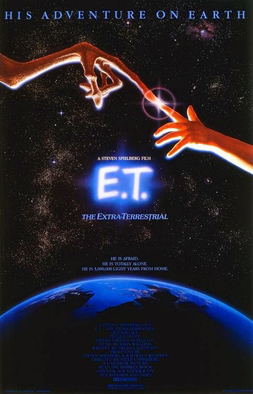

In [27]:
r = requests.get(page.data['image'][0]['url'])
i = Image.open(BytesIO(r.content))
i

In [28]:

# List of dictionaries to build and convert to a DataFrame later
df_list = []
image_errors = {}
for title in title_list:
    try:
        # This cell is slow so print ranking to gauge time remaining
        ranking = title_list.index(title) + 1 #note that the list is pre-ranked and thats why this is okay
        print(ranking)
        page = wptools.page(title, silent=True).get()
        # Your code here (three lines)
        images =page.data['image'][0]
        # First image is usually the poster
        first_image_url =page.data['image'][0]['url']
        r = requests.get(first_image_url)
        # Download movie poster image
        
        filename=(folder_name + "/" + str(ranking) + "_" + title)
        try:
            if os.path.exists(glob.glob(filename+'.*')[0]):
                pass
        except:
            print('getting image')
            i = Image.open(BytesIO(r.content))
            image_file_format = first_image_url.split('.')[-1]
            i.save(filename + '.' + image_file_format)
        # Append to list of dictionaries
        df_list.append({'ranking': int(ranking),
                        'title': title,
                        'poster_url': first_image_url})
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(str(ranking) + "_" + title + ": " + str(e))
        image_errors[str(ranking) + "_" + title] = images

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


API error: {'code': 'invalidtitle', 'info': 'Bad title "A_Hard_Day%27s_Night_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}


22_A_Hard_Day%27s_Night_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=A_Hard_Day%2527s_Night_%28film%29
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


API error: {'code': 'invalidtitle', 'info': 'Bad title "Rosemary%27s_Baby_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}


72_Rosemary%27s_Baby_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Rosemary%2527s_Baby_%28film%29
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [29]:
for key in image_errors.keys():
    print(key)

22_A_Hard_Day%27s_Night_(film)
72_Rosemary%27s_Baby_(film)


In [30]:
# Inspect un# List of dictionaries to build and convert to a DataFrame later
for rank_title, images in image_errors.items():
    
    if rank_title == '17_Moonlight_(2016_film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/8/84/Moonlight_%282016_film%29.png'
    if rank_title == '22_A_Hard_Day%27s_Night_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/4/47/A_Hard_Days_night_movieposter.jpg'
    if rank_title == '53_12_Angry_Men_(1957_film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/9/91/12_angry_men.jpg'
    if rank_title == '72_Rosemary%27s_Baby_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/e/ef/Rosemarys_baby_poster.jpg'
    if rank_title == '93_Harry_Potter_and_the_Deathly_Hallows_–_Part_2':
        url = 'https://upload.wikimedia.org/wikipedia/en/d/df/Harry_Potter_and_the_Deathly_Hallows_%E2%80%93_Part_2.jpg'
    title = rank_title[3:]
    df_list.append({'ranking': int(title_list.index(title) + 1),
                    'title': title,
                    'poster_url': url})
    r = requests.get(url)
    # Download movie poster image
    i = Image.open(BytesIO(r.content))
    image_file_format = url.split('.')[-1]
    i.save(folder_name + "/" + rank_title + '.' + image_file_format)

In [31]:
# Create DataFrame from list of dictionaries
df_poster = pd.DataFrame(df_list, columns = ['ranking', 'title', 'poster_url'])
df_poster = df_poster.sort_values('ranking').reset_index(drop=True)
df_poster.head()

,ranking,title,poster_url
0,1,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen_Kane,https://upload.wikimedia.org/wikipedia/en/c/ce...
2,3,The_Third_Man,https://upload.wikimedia.org/wikipedia/en/2/21...
3,4,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/e/eb...
4,5,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...


## Merge tables to save flatly

In [33]:
dfmaster=df.merge(df_poster,how='left',on='ranking',suffixes=('','_wiki'))
dfmaster.head()

,ranking,critic_score,title,number_of_critic_ratings,title_wiki,poster_url
0,1,99,The Wizard of Oz (1939),110,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...
1,2,100,Citizen Kane (1941),75,Citizen_Kane,https://upload.wikimedia.org/wikipedia/en/c/ce...
2,3,100,The Third Man (1949),77,The_Third_Man,https://upload.wikimedia.org/wikipedia/en/2/21...
3,4,99,Get Out (2017),282,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/e/eb...
4,5,97,Mad Max: Fury Road (2015),370,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...


In [34]:
dfmaster=dfmaster.merge(df_audience,how='left',on='title')
dfmaster.head()

,ranking,critic_score,title,number_of_critic_ratings,title_wiki,poster_url,audience_score,number_of_audience_ratings
0,1,99,The Wizard of Oz (1939),110,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...,89,874425
1,2,100,Citizen Kane (1941),75,Citizen_Kane,https://upload.wikimedia.org/wikipedia/en/c/ce...,90,157274
2,3,100,The Third Man (1949),77,The_Third_Man,https://upload.wikimedia.org/wikipedia/en/2/21...,93,53081
3,4,99,Get Out (2017),282,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/e/eb...,87,63837
4,5,97,Mad Max: Fury Road (2015),370,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...,86,123937


In [35]:
dfmaster=dfmaster.merge(df_ebert,how='left',on='title')
dfmaster.head()

,ranking,critic_score,title,number_of_critic_ratings,title_wiki,poster_url,audience_score,number_of_audience_ratings,review_url,review_text
0,1,99,The Wizard of Oz (1939),110,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...,89,874425,http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,2,100,Citizen Kane (1941),75,Citizen_Kane,https://upload.wikimedia.org/wikipedia/en/c/ce...,90,157274,http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...
2,3,100,The Third Man (1949),77,The_Third_Man,https://upload.wikimedia.org/wikipedia/en/2/21...,93,53081,http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...
3,4,99,Get Out (2017),282,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/e/eb...,87,63837,http://www.rogerebert.com/reviews/get-out-2017,"With the ambitious and challenging “Get Out,” ..."
4,5,97,Mad Max: Fury Road (2015),370,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...,86,123937,http://www.rogerebert.com/reviews/mad-max-fury...,George Miller’s “Mad Max” films didn’t just ma...


## Save flat output

In [36]:
dfmaster.to_csv('bestofrt_master.csv', index=False)


## Save SQL output

In [37]:
from sqlalchemy import create_engine

In [38]:
# Create SQLAlchemy Engine and empty bestofrt database
# bestofrt.db will not show up in the Jupyter Notebook dashboard yet
engine = create_engine('sqlite:///bestofrt.db')

In [39]:
# Store cleaned master DataFrame ('dfmaster') in a table called master in bestofrt.db
# bestofrt.db will be visible now in the Jupyter Notebook dashboard
dfmaster.to_sql('master', engine, index=False)

## Read in SQL output

In [ ]:
df_gather = pd.read_sql('SELECT * FROM master', engine)
df_gather.head(3)